In [ ]:
!pip install pandas h5py matplotlib


In [3]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'S:/nova/data/DFG_A1_A2b/NP001/NP001_w2v_dino_labels_data.hdf5'


with h5py.File(file_path, 'r') as f:
    print("Keys: %s" % f.keys())

    infant_labels = np.array(f['infant_labels'])
    caretaker_labels = np.array(f['caretaker_labels'])
    min_length = min(len(infant_labels), len(caretaker_labels))

    df1 = pd.DataFrame({
        'Infant Labels': infant_labels[:min_length],
        'Caretaker Labels': caretaker_labels[:min_length]
    })


Keys: <KeysViewHDF5 ['caretaker_dino_features', 'caretaker_labels', 'frame_numbers', 'infant_dino_features', 'infant_labels', 'session_names', 'w2v_features']>


In [4]:
df1

,Infant Labels,Caretaker Labels
0,b'INEU',b'CPOS'
1,b'INON',b'CPOS'
2,b'INON',b'CPOS'
3,b'INON',b'CPOS'
4,b'INON',b'CPOS'
...,...,...
9570,b'INON',b'CPOS'
9571,b'INON',b'CPOS'
9572,b'INON',b'CPOS'
9573,b'INON',b'CPOS'


In [5]:
df1['Infant Labels'] = df['Infant Labels'].str.decode('utf-8')
df1['Caretaker Labels'] = df['Caretaker Labels'].str.decode('utf-8')
df1


NameError: name 'df' is not defined

In [6]:
with h5py.File(file_path, 'r') as f:
    w2v_features = np.array(f['w2v_features'])
    infant_labels = np.array(f['infant_labels'])
    caretaker_labels = np.array(f['caretaker_labels'])
    infant_dino_features = np.array(f['infant_dino_features'])
    caretaker_dino_features = np.array(f['caretaker_dino_features'])

    w2v_features_mean = w2v_features.mean(axis=1)
    infant_dino_features_mean = infant_dino_features.mean(axis=1)
    caretaker_dino_features_mean = caretaker_dino_features.mean(axis=1)


min_length = min(len(w2v_features_mean), len(infant_labels), len(caretaker_labels), len(infant_dino_features), len(caretaker_dino_features))
w2v_features_mean = w2v_features_mean[:min_length]
infant_labels = infant_labels[:min_length]
caretaker_labels = caretaker_labels[:min_length]
infant_dino_features_mean = infant_dino_features_mean[:min_length]
caretaker_dino_features_mean = caretaker_dino_features_mean[:min_length]

df = pd.DataFrame({
    'W2V Features Mean': w2v_features_mean,
    'Infant Labels': infant_labels,
    'Caretaker Labels': caretaker_labels
})

df['Infant Dino Features Mean'] = infant_dino_features_mean
df['Caretaker Dino Features Mean'] = caretaker_dino_features_mean

# Visualize the data

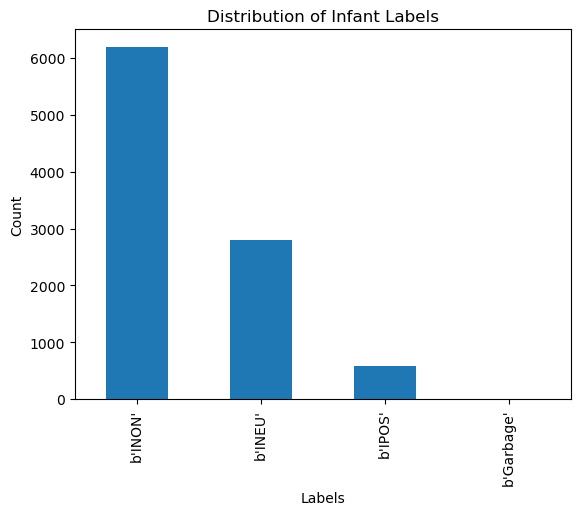

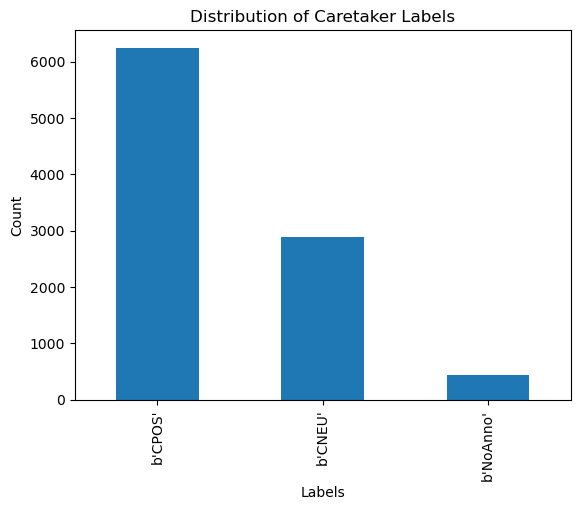

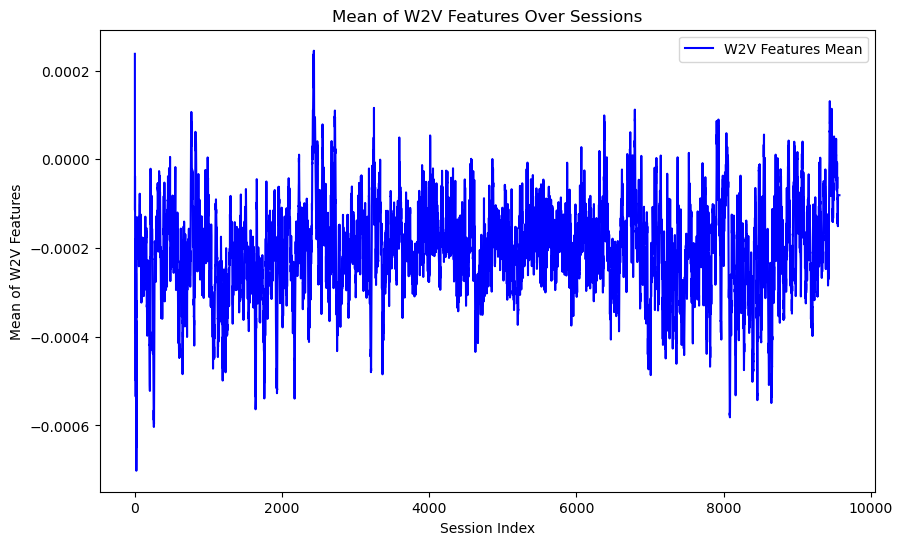

In [7]:

df['Infant Labels'].value_counts().plot(kind='bar')
plt.title('Distribution of Infant Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Distribution of Caretaker Labels
df['Caretaker Labels'].value_counts().plot(kind='bar')
plt.title('Distribution of Caretaker Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Example: Plotting the mean of W2V Features
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['W2V Features Mean'], label='W2V Features Mean', color='blue')
plt.title('Mean of W2V Features Over Sessions')
plt.xlabel('Session Index')
plt.ylabel('Mean of W2V Features')
plt.legend()
plt.show()

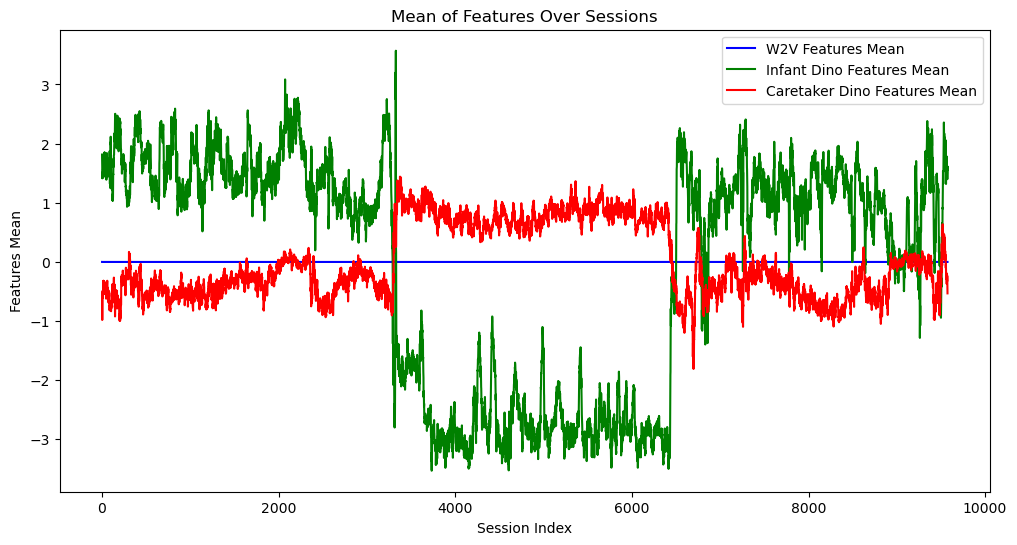

In [8]:
# Visualise foundation modal features
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['W2V Features Mean'], label='W2V Features Mean', color='blue')
plt.plot(df.index, df['Infant Dino Features Mean'], label='Infant Dino Features Mean', color='green')
plt.plot(df.index, df['Caretaker Dino Features Mean'], label='Caretaker Dino Features Mean', color='red')

plt.title('Mean of Features Over Sessions')
plt.xlabel('Session Index')
plt.ylabel('Features Mean')
plt.legend()
plt.show()

# Normalise

In [9]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [12]:
def load_and_normalize_features(hdf5_file_path):
    """Load and normalize features from an HDF5 file."""
    with h5py.File(hdf5_file_path, 'r') as f:
        # Load raw features
        w2v_features_raw = f['w2v_features'][:]
        infant_dino_features_raw = f['infant_dino_features'][:]
        caretaker_dino_features_raw = f['caretaker_dino_features'][:]

    # Normalize the features
    scaler = StandardScaler()
    w2v_features_normalized = scaler.fit_transform(w2v_features_raw)
    infant_dino_features_normalized = scaler.fit_transform(infant_dino_features_raw)
    caretaker_dino_features_normalized = scaler.fit_transform(caretaker_dino_features_raw)

    return w2v_features_normalized, infant_dino_features_normalized, caretaker_dino_features_normalized

def plot_normalized_feature_means(w2v_features_normalized, infant_dino_features_normalized,
                                  caretaker_dino_features_normalized):
    """Plot the mean of normalized features for comparison."""
    # Compute means across the feature dimension
    w2v_features_mean = np.mean(w2v_features_normalized, axis=1)
    infant_dino_features_mean = np.mean(infant_dino_features_normalized, axis=1)
    caretaker_dino_features_mean = np.mean(caretaker_dino_features_normalized, axis=1)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(w2v_features_mean, label='W2V Features Mean', alpha=0.7)
    plt.plot(infant_dino_features_mean, label='Infant Dino Features Mean', alpha=0.7)
    plt.plot(caretaker_dino_features_mean, label='Caretaker Dino Features Mean', alpha=0.7)

    plt.title('Comparison of Normalized Feature Means')
    plt.xlabel('Observation Index')
    plt.ylabel('Normalized Mean Value')
    plt.legend()
    plt.show()

In [13]:
w2v_features_normalized, infant_dino_features_normalized, caretaker_dino_features_normalized= load_and_normalize_features(file_path)

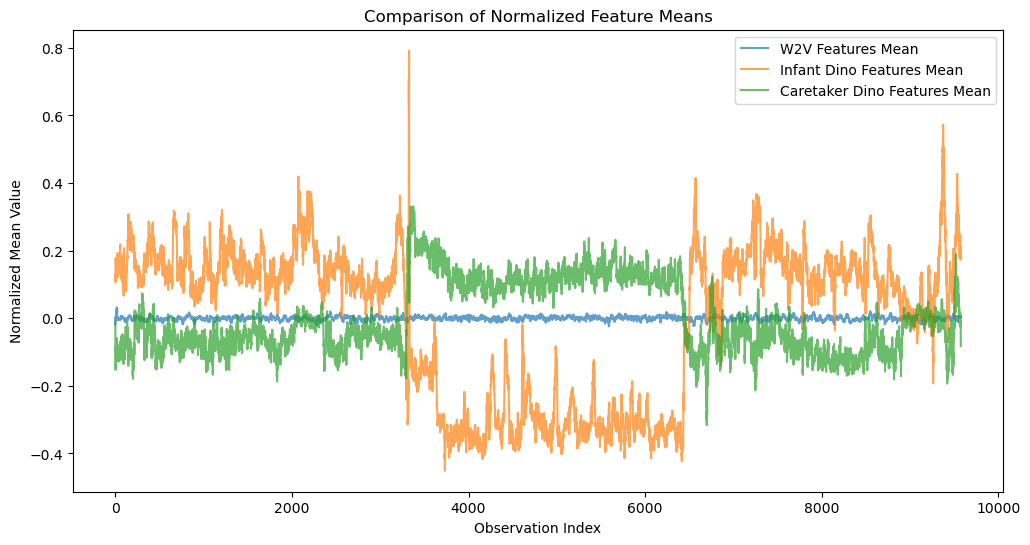

In [14]:
plot_normalized_feature_means(w2v_features_normalized, infant_dino_features_normalized,
                                  caretaker_dino_features_normalized)

In [24]:
def analyze_features_statistics(df):
    """Analyze and print statistical report for the numeric columns in the DataFrame."""
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print(df.head())
    for column in numeric_cols:
        print("\nStatistics for %s:", column)
        mean = df[column].mean()
        variance = df[column].var()
        min_val = df[column].min()
        max_val = df[column].max()
        median = df[column].median()
        skewness = df[column].skew()
        kurtosis = df[column].kurtosis()

        print(f"Mean: {mean}, Variance: {variance}, Min: {min_val}, Max: {max_val}, Median: {median}, Skewness: {skewness}, Kurtosis: {kurtosis}" )

        _, p = stats.normaltest(df[column].dropna())
        print(f"Normality test (D'Agostino and Pearson's) p-value: {p}" )



In [25]:
analyze_features_statistics(df)

   W2V Features Mean Infant Labels Caretaker Labels  \
0           0.000238       b'INEU'          b'CPOS'   
1          -0.000115       b'INON'          b'CPOS'   
2          -0.000038       b'INON'          b'CPOS'   
3          -0.000103       b'INON'          b'CPOS'   
4          -0.000327       b'INON'          b'CPOS'   

   Infant Dino Features Mean  Caretaker Dino Features Mean  
0                   1.815283                     -0.537405  
1                   1.745434                     -0.722748  
2                   1.625423                     -0.981175  
3                   1.413472                     -0.976095  
4                   1.464442                     -0.826033  

Statistics for %s: W2V Features Mean
Mean: -0.00020409583521541208, Variance: 1.0595632815579847e-08, Min: -0.0007019496988505125, Max: 0.00024462630972266197, Median: -0.0002021361142396927, Skewness: -0.09519967436790466, Kurtosis: 0.9459275007247925
Normality test (D'Agostino and Pearson's) p-value

In [28]:
w2v_features_mean = np.mean(w2v_features_normalized, axis=1)
infant_dino_features_mean = np.mean(infant_dino_features_normalized, axis=1)
caretaker_dino_features_mean = np.mean(caretaker_dino_features_normalized, axis=1)


In [29]:

df_norm = pd.DataFrame({
    'w2v_features_normalized': w2v_features_mean,
    'infant_dino_features_normalized': infant_dino_features_mean,
    'caretaker_dino_features_normalized': caretaker_dino_features_mean
})

df_norm

,w2v_features_normalized,infant_dino_features_normalized,caretaker_dino_features_normalized
0,-0.018693,0.177065,-0.010679
1,-0.010306,0.170240,-0.061182
2,0.003702,0.155280,-0.121257
3,-0.001281,0.106018,-0.152519
4,-0.006649,0.127401,-0.140888
...,...,...,...
9570,0.003529,0.200665,-0.022173
9571,0.003529,0.212073,0.007315
9572,0.003529,0.173137,-0.011501
9573,0.003529,0.207327,-0.010094


In [30]:
analyze_features_statistics(df_norm)

   w2v_features_normalized  infant_dino_features_normalized  \
0                -0.018693                         0.177065   
1                -0.010306                         0.170240   
2                 0.003702                         0.155280   
3                -0.001281                         0.106018   
4                -0.006649                         0.127401   

   caretaker_dino_features_normalized  
0                           -0.010679  
1                           -0.061182  
2                           -0.121257  
3                           -0.152519  
4                           -0.140888  

Statistics for %s: w2v_features_normalized
Mean: -3.1125140659282735e-11, Variance: 3.3669479307718575e-05, Min: -0.023889191448688507, Max: 0.03226560354232788, Median: 8.987262845039368e-06, Skewness: -0.06648250669240952, Kurtosis: 0.5183302760124207
Normality test (D'Agostino and Pearson's) p-value: 2.6676357652670333e-17

Statistics for %s: infant_dino_features_normalized


W2V Features Normalized
Mean: Very close to 0, as expected after standardization.
Variance: Quite small, indicating that values are closely clustered around the mean.
Min/Max: The range is relatively narrow, suggesting no extreme outliers after normalization.
Median: Also very close to 0, aligning with the mean, indicating a symmetrical distribution around the center.
Skewness: Slightly negative, indicating a distribution that is skewed left, but the magnitude is small, suggesting it’s almost symmetrical.
Kurtosis: Slightly greater than 0, indicating a leptokurtic distribution, which has slightly heavier tails than a normal distribution, but again, the value is modest.
Normality Test: The very small p-value rejects the null hypothesis of normality, indicating the distribution of the normalized w2v_features is not normal.
Infant Dino Features Normalized
Mean: Exactly 0, indicating perfect centering by the standardization process.
Variance: Slightly larger than for w2v_features, indicating a bit more spread in the data.
Min/Max: The range is wider than w2v_features, suggesting more variability.
Median: Closer to 0, but not exactly 0, indicating a slight shift in the distribution's center.
Skewness: Negative, indicating a left-skewed distribution. The magnitude is larger than in w2v_features, suggesting a more pronounced skew.
Kurtosis: Negative, indicating a platykurtic distribution, which is flatter than a normal distribution with lighter tails.
Normality Test: The p-value of 0 strongly rejects normality, indicating that the distribution of infant_dino_features is significantly non-normal.
Caretaker Dino Features Normalized
Mean: Essentially 0, indicating successful standardization.
Variance: Indicates variability, smaller than infant_dino_features but larger than w2v_features.
Min/Max: Shows a relatively contained range, similar to w2v_features.
Median: Slightly negative, indicating a small shift in the distribution's center.
Skewness: Positive, indicating a right-skewed distribution. This skew is more pronounced than in w2v_features.
Kurtosis: Negative, suggesting a platykurtic distribution similar to infant_dino_features, but less extreme.
Normality Test: The extremely small p-value rejects the hypothesis of normality, indicating non-normal distribution.
Overall Insights
Normalization Effectiveness: The means being close to 0 and variances around 1 (for w2v_features and caretaker_dino_features; slightly higher for infant_dino_features) indicate successful standardization.
Distribution Shape: All three feature sets show deviations from normality, with varying degrees of skewness and kurtosis. This deviation suggests that linear assumptions might not hold perfectly for these features, and models that don't assume normality might be more appropriate.
Model Considerations: Given the non-normality and characteristics of these distributions, machine learning models that can handle non-linear relationships and do not assume data normality (e.g., tree-based models, neural networks) might be more suitable for these features.